In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 

plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_palette('Set2')
%matplotlib inline
#sns.set(style="white")
#sns.set(style="whitegrid", color_codes=True)

In [2]:
def make_plot(the_df, field, title, figsize, rotation=None, fontsize=None):
    sns.set_style('whitegrid')
    total = len(the_df[field])*1.
    plt.figure(figsize=figsize)
    ax = sns.countplot(x = field, data = the_df, palette = 'hls' )
    plt.title(title)
    plt.ylabel('Frequency [%]')
    #plt.ylabel('Frequency')
    
    #if len(ax.patches)< 8:
        # Format 250 (60%)
    #    for p in ax.patches:
    #        ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    #else:
        # Format 60%
    for p in ax.patches:

        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
        
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks
    #_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right", fontsize=fontsize)
    plt.tight_layout()
    
    plt.show()

In [43]:
#ax = sns.countplot(x="main activity of respondents", hue="What is your gender", data=graduates_data)

def make_twiplot_y(the_df, field, hue, title, figsize, check=None, orient = None, rotation=None, fontsize=None):

    sns.set_style('whitegrid')
    total = len(the_df[field])*1.
    plt.figure(figsize=figsize)
    ax = sns.countplot(y=field, hue=hue, data=the_df)

    plt.title(title)
    plt.xlabel('Frequency [%]')
    for p in ax.patches:

        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
        
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.xaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks
    #_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))
    
    ax.set_yticklabels(ax.get_yticklabels(), rotation=rotation, ha="right", fontsize=fontsize)
    plt.tight_layout()
    
    plt.show()
        



In [ ]:
def make_twiplot_x(the_df, field, hue, title, figsize, check=None, orient = None, rotation=None, fontsize=None):
    sns.set_style('whitegrid')
    total = len(the_df[field])*1.
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=field, hue=hue, data=the_df)
    plt.title(title)
    plt.ylabel('Frequency [%]')
    #plt.ylabel('Frequency')
    
    #if len(ax.patches)< 8:
        # Format 250 (60%)
    #    for p in ax.patches:
    #        ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    #else:
        # Format 60%
    for p in ax.patches:

        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
        
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks
    #_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right", fontsize=fontsize)
    plt.tight_layout()
    
    plt.show()

In [4]:
xlsx = pd.ExcelFile('Nigerian Graduates Destination Survey (2013 -2017) (Responses) - nigerian graduates survey 2018.xlsx')

In [5]:
graduates_data = pd.read_excel(xlsx, 'Nigerian Graduates Destination ')

In [6]:
# Original shape  (rows and columns)
print(graduates_data.shape)

(5219, 36)


In [7]:
# Remove rows with missing
graduates_data = graduates_data.dropna()

# Show data - head
graduates_data.head()

,Timestamp,What is your gender,Year of graduation,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,How many jobs have you had since graduation including your current one?,Have you completed your NYSC?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",...,What currency are you currently paid in?,Approximately how many hours a day do you currently work?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
4,2018-02-16 13:18:03,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills
5,2018-02-16 16:44:18,Male,2015,Electrical & Electronic Engineering,University of Benin,Bachelor's degree,Working full time (paid employment),2,No,2013.0,...,Naira,10.0,Capacity,Social media/professional networking sites,No,Car,No: From my current job,Agree,Agree,"Ability to work with others, Knowledge of the ..."
6,2018-02-19 07:24:05,Male,2013,Economics,"Bowen University, Iwo",Higher National Diploma (HND),Working full time (paid employment),4,Yes,2016.0,...,Naira,8.0,Don't know,"University/polytechnic (e.g. Careers Service, ...",Yes: during my higher education study,Commercial Vehicles,No: From my current job,Strongly Disagree,Strongly Disagree,"Critical thinking skills, Ability to work with..."
8,2018-02-19 08:53:52,Female,2017,Industrial Relations and Personnel Management,Covenant University Ota,Bachelor's degree,Youth Corper (NYSC),2,Ongoing,2018.0,...,Naira,9.0,The subject(s) I studied,"Personal contacts, including family and friends",No,Keke Marwa/Napep/Tricycle,No,Agree,Agree,Ability to work with others
10,2018-02-19 09:19:58,Male,2015,Economics,University of Ibadan,Bachelor's degree,Due to start a job in the next month/developin...,3,Yes,2016.0,...,Naira,9.0,No one thing was important,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Strongly Disagree,Strongly Disagree,"Critical thinking skills, Written communicatio..."


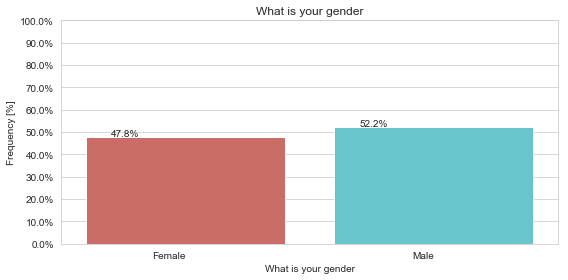

In [8]:
make_plot(the_df=graduates_data, field="What is your gender", title="What is your gender", figsize=(8,4), rotation=None, fontsize=None)


In [9]:
graduates_data['What best describes your current status?'].value_counts()

Working full time (paid employment)                                                           593
Youth Corper (NYSC)                                                                           164
Self-employed/freelance/entrepreneur                                                          151
Unemployed                                                                                    122
Voluntary or other unpaid work or on an internship                                             80
Engaged in full-time further study, training or research                                       38
Due to start a job in the next month/developing a professional portfolio/creative practice     37
Taking time out to prepare for further studies, GMAT, professional exams                       21
Doing something else (e.g. looking after home or family)                                       16
Engaged in part-time further study, training or research                                        7
Name: What best desc

In [10]:
def label_race(row):

    if row['What best describes your current status?']=='Working full time (paid employment)':
        return "Working full time"
    elif row['What best describes your current status?']=='Youth Corper (NYSC)':
        return "Working full time"
    elif row['What best describes your current status?']=='Self-employed/freelance/entrepreneur':
        return "Working full time"
    elif row['What best describes your current status?']=='Unemployed':
        return "Unemployed"

    elif row['What best describes your current status?']=='Engaged in full-time further study, training or research':
        return "Engaged in further study"
    
    elif row['What best describes your current status?']=='Engaged in part-time further study, training or research':
        return "Engaged in further study"
    elif row['What best describes your current status?']=='Taking time out to prepare for further studies, GMAT, professional exams':
        return "Preparing for further study"
    else:
        return np.nan
graduates_data["main activity of respondents"] = graduates_data.apply (lambda row: label_race (row),axis=1)
main_activity_labels = list(set(graduates_data["main activity of respondents"].dropna().values))[::-1]
main_activity_labels


['Preparing for further study',
 'Engaged in further study',
 'Unemployed',
 'Working full time']

In [52]:
gender_label = list(set(graduates_data["What is your gender"].values))

main activity of respondents  What is your gender
Engaged in further study      Female                  23
                              Male                    22
Preparing for further study   Female                  11
                              Male                    10
Unemployed                    Female                  61
                              Male                    61
Working full time             Female                 437
                              Male                   471
Name: What is your gender, dtype: int64


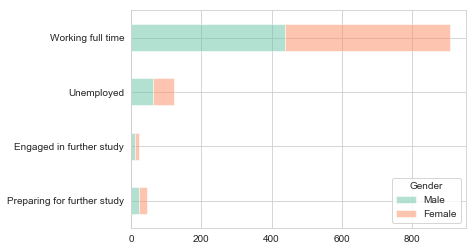

In [56]:
print(graduates_data.groupby(['main activity of respondents','What is your gender'])["What is your gender"].count())
arr = np.array(graduates_data.groupby(['main activity of respondents','What is your gender'])["What is your gender"].count().values.tolist())
gdata = arr.reshape((4,2))
index = main_activity_labels
columns = pd.Index(gender_label, name="Gender")
pd.DataFrame(gdata, index=index,columns=columns).plot.barh(stacked=True, alpha=0.5)

In [66]:
education_level = list(set(graduates_data["What is your highest level of education?"].values))
education_level

['Higher National Diploma (HND)',
 'Ordinary National Diploma (OND)',
 'MBA degree',
 "Master's degree",
 "Bachelor's degree",
 'PhDs/Doctorate Degree']

In [129]:
def hbar_cross(the_df, title):

    sns.set_style('whitegrid')
    total = len(the_df[main_activity_labels])*1
    plt.figure(figsize=(12,12))

    axx = the_df.plot.bar(stacked=True, alpha=0.5)


    plt.title(title)
    plt.xlabel('Frequency [%]')
    for p in axx.patches:
        axx.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.xaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks
    #_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    axx.set_xticklabels(map('{:.1f}%'.format, 0.1*axx.xaxis.get_majorticklocs()/total))
    print(axx.xaxis.get_majorticklocs())
    axx.set_yticklabels(axx.get_yticklabels(), rotation=None, ha="right", fontsize=None)
    plt.tight_layout()

    plt.show()


What is your highest level of education?  main activity of respondents
Bachelor's degree                         Engaged in further study         29
                                          Preparing for further study      19
                                          Unemployed                       99
                                          Working full time               775
Higher National Diploma (HND)             Preparing for further study       1
                                          Unemployed                       11
                                          Working full time                50
MBA degree                                Working full time                 6
Master's degree                           Engaged in further study         14
                                          Unemployed                       11
                                          Working full time                74
Ordinary National Diploma (OND)           Engaged in further study     

C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\matplotlib\tight_layout.py:177: UserWarning: The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('The left and right margins cannot be made large '


<Figure size 864x864 with 0 Axes>

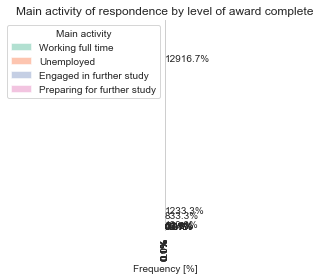

6

In [130]:
 print(graduates_data.groupby(["What is your highest level of education?", "main activity of respondents"])["main activity of respondents"].count())
#arr_activity = np.array(graduates_data.groupby(["What is your highest level of education?", "main activity of respondents"])["main activity of respondents"].count().values.tolist())
#gdata_activity ={ education_level[0]: graduates_data.groupby(["What is your highest level of education?", "main activity of respondents"])["main activity of respondents"].count().values.tolist()[0:3],
#                education_level[1]: graduates_data.groupby(["What is your highest level of education?", "main activity of respondents"])["main activity of respondents"].count().values.tolist()[4:6],
#                education_level[2]: graduates_data.groupby(["What is your highest level of education?", "main activity of respondents"])["main activity of respondents"].count().values.tolist()[7],
#                education_level[3]: graduates_data.groupby(["What is your highest level of education?", "main activity of respondents"])["main activity of respondents"].count().values.tolist()[8:10],
#                education_level[4]: graduates_data.groupby(["What is your highest level of education?", "main activity of respondents"])["main activity of respondents"].count().values.tolist()[11:13],
#                education_level[5]: graduates_data.groupby(["What is your highest level of education?", "main activity of respondents"])["main activity of respondents"].count().values.tolist()[14:15]}
#col_len = len(education_level)
#row_len = len(main_activity_labels)
gdata_activity = [[775,99,19,29], [50,11,1, np.nan], [6, np.nan, np.nan, np.nan], [74, 11, np.nan, 14], [2,1,np.nan, 2], [1, np.nan, np.nan, 1]]

print(gdata_activity)
#gdata_activity = arr_activity.reshape((col_len,row_len))  #4, 2
index_activity = education_level
columns_activity = pd.Index(main_activity_labels[::-1], name="Main activity")
gdata_a = pd.DataFrame(gdata_activity, index=index_activity,columns=columns_activity)

hbar_cross(the_df = gdata_a, title = "Main activity of respondence by level of award complete")

len(gdata_a[main_activity_labels])

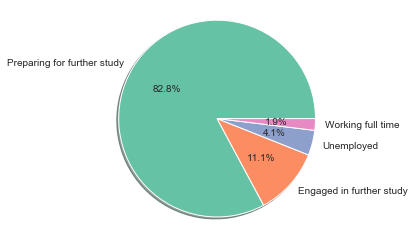

In [126]:

#make_plot(the_df=graduates_data, field="main activity of respondents", title="main activity of respondents", figsize=(8,4), rotation=40, fontsize=None)

# pie chart of workers
labels = main_activity_labels
sizes = [graduates_data['main activity of respondents'].value_counts()[0],
         graduates_data['main activity of respondents'].value_counts()[1],
         graduates_data['main activity of respondents'].value_counts()[2],
         graduates_data['main activity of respondents'].value_counts()[3]
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [20]:
#sns.countplot(y="main activity of respondents", hue="What is your gender", orient="v",data=graduates_data)
#sns.catplot(y="deck", hue="class", kind="count", palette="pastel", edgecolor=".6", data=titanic);

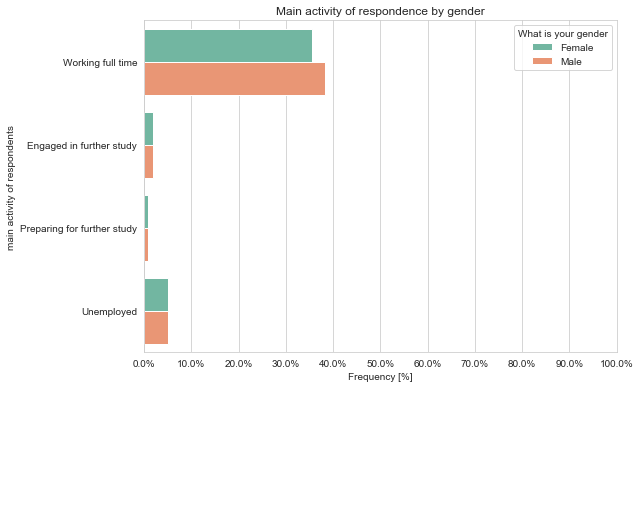

In [42]:
make_twiplot_y(the_df=graduates_data, field="main activity of respondents", hue="What is your gender", title="Main activity of respondence by gender", figsize=(9, 8), orient = "v", rotation=None, fontsize=None)

#ax = sns.countplot(x="main activity of respondents", hue="What is your gender", data=graduates_data)
